In [ ]:
#http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.0-image-augmentation.ipynb
# many information about data augmentation

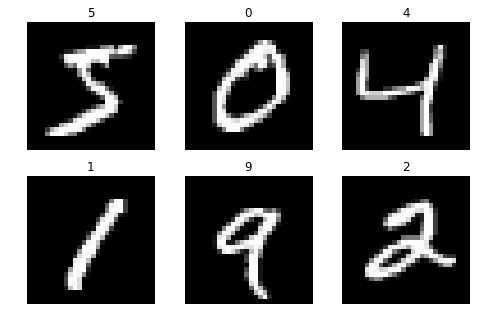

In [7]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# image size
plt.figure(figsize=(8,8))

# 產生一個3x2網格的組合圖像
for i in range(0, 6):
    plt.subplot(330+1+i)
    plt.title(y_train[i])
    plt.axis('off')
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

In [26]:
X_train.shape

(60000, 28, 28)

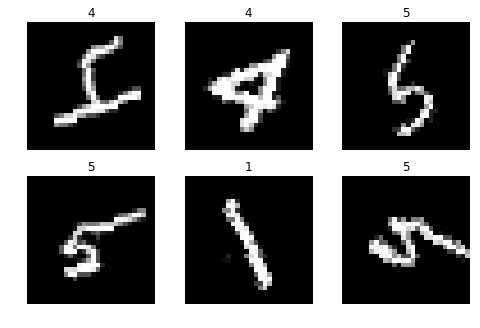

In [17]:
from keras.preprocessing.image import ImageDataGenerator

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# degrees (0 to 180)
datagen = ImageDataGenerator(rotation_range=90)

# 透過訓練數據集來訓練(fit)圖像數據增強產生器(ImageDataGenerator)的實例
datagen.fit(X_train)

# Batch size defines number of samples that going to be propagated through the network.
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

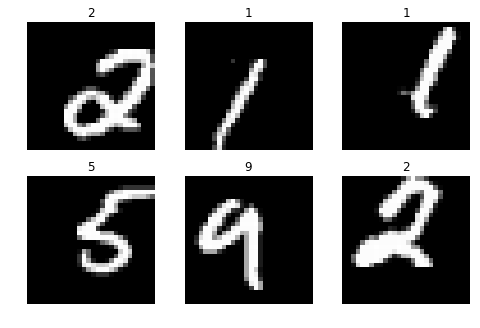

In [28]:
## shift

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# fraction of total height or width.
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

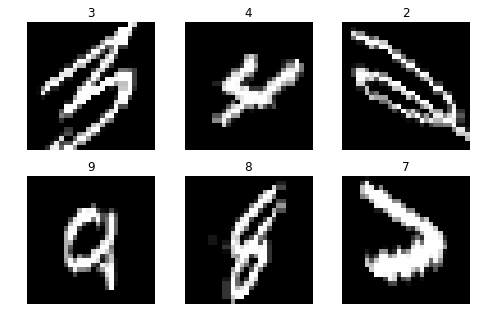

In [29]:
# random shear

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# shear intensity (shear angle in radians)
shear_range=1.25
datagen = ImageDataGenerator(shear_range=shear_range)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

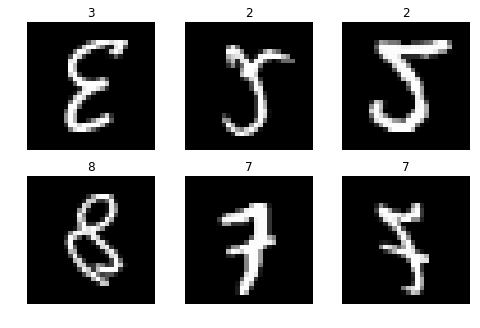

In [30]:
# random flips

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break


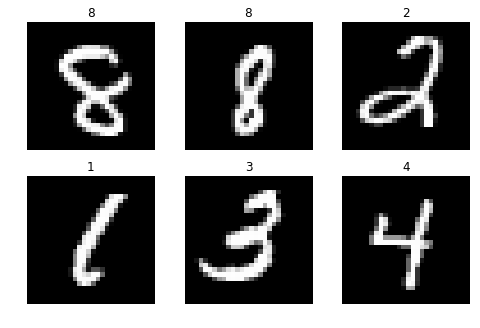

In [31]:
# feature standardization
# ?

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break



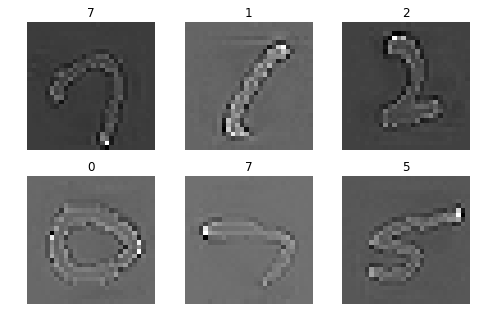

In [32]:
# ZCA Whitening

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=6):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

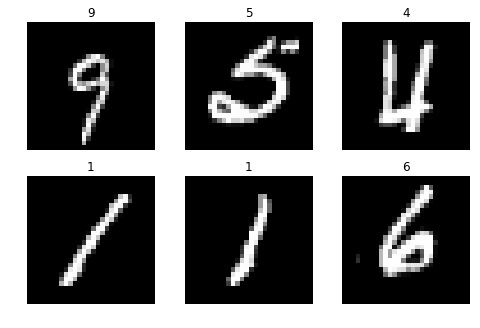

In [35]:
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator()

datagen.fit(X_train)

if not os.path.exists('images'):
    os.makedirs('images')
    
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    plt.figure(figsize=(8,8))
    for i in range(0, 6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

In [34]:
os.getcwd()

'/Users/r3dmaohong/workspace/dataScience/python/deep-learning/keras'